In [1]:
#Import dependencies
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [2]:
#Read CSV from Resources and create DataFrame
spotify_df = pd.read_csv("Resources/spotify_from_2000-2019.csv")

#Display DataFrame
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values,x_loc,y_loc,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")

#Exploring the Relationship Between Popularity & Energy

The r-squared is: 0.00019659551381474686


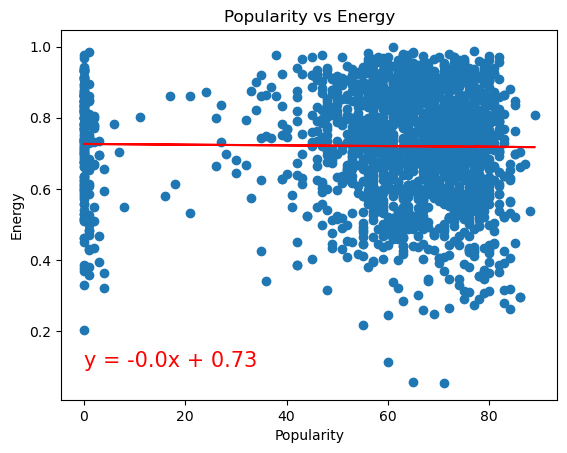

In [4]:
#Explore the relationship between song energy and popularity for entire dataset
x_values = spotify_df["popularity"]
y_values = spotify_df["energy"]
linear_reg_plot(x_values, y_values, 0, 0.1, "Popularity", "Energy", "Popularity vs Energy")
plt.show()

In [5]:
#Create DataFrame of songs with popularity>50
popular_df = pd.DataFrame(spotify_df.loc[spotify_df['popularity']>=50,:])

# Display popular data
popular_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


The r-squared is: 0.00815688845550791


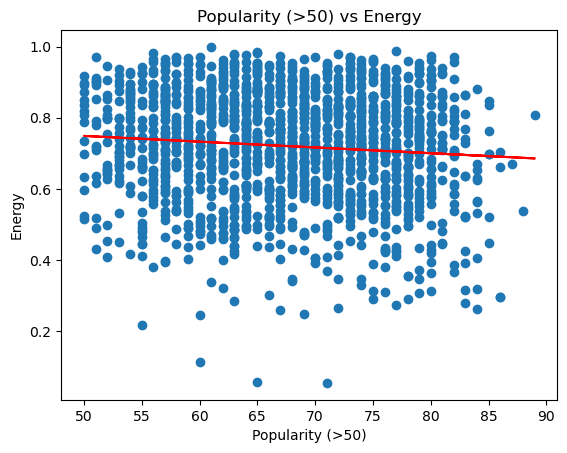

In [6]:
#Explore the relationship between song energy and popularity for popularity>50
x_values = popular_df["popularity"]
y_values = popular_df["energy"]
linear_reg_plot(x_values, y_values, 0, 0.1, "Popularity (>50)", "Energy", "Popularity (>50) vs Energy")
plt.show()

#Exploring the Relationship between Explicit Nature & Popularity

In [7]:
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in spotify_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

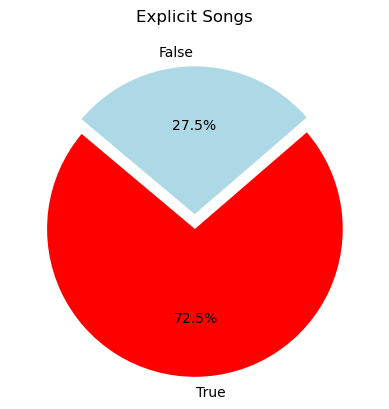

In [8]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs")
plt.show()

In [9]:
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in popular_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

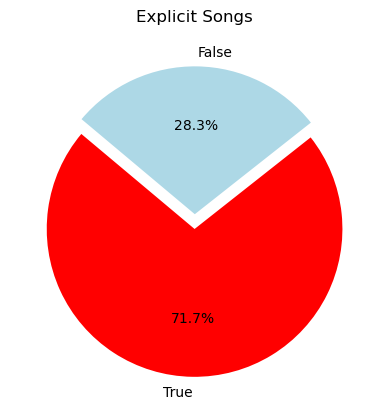

In [10]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs")
plt.show()

#Comparing Data From 2000s vs 2010s

In [15]:
#Create DataFrame of songs from 1999-2009
early_df = pd.DataFrame(spotify_df.loc[spotify_df['year']<=2009,:])

# Display popular data
early_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [18]:
#Create DataFrame of songs from 2010-2019
late_df = pd.DataFrame(spotify_df.loc[spotify_df['year']>2009,:])

# Display popular data
late_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.03280,0.0482,0.3600,0.808,139.066,pop
29,Chicane,Don't Give Up,210786,False,2016,47,0.644,0.720,10,-9.635,0,0.0419,0.00145,0.5040,0.0839,0.530,132.017,Dance/Electronic
46,Samantha Mumba,Gotta Tell You,201946,False,2018,43,0.729,0.632,0,-8.750,0,0.0279,0.19100,0.0000,0.1660,0.774,109.981,pop
60,DJ Ötzi,Hey Baby (Radio Mix),219240,False,2010,58,0.666,0.968,10,-3.196,1,0.0460,0.12300,0.0000,0.3470,0.834,135.099,"pop, easy listening, Dance/Electronic"
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,199480,False,2011,0,0.471,0.514,1,-5.599,1,0.0315,0.58400,0.0000,0.1030,0.373,117.338,"pop, R&B"


The r-squared is: 0.01401598848586917


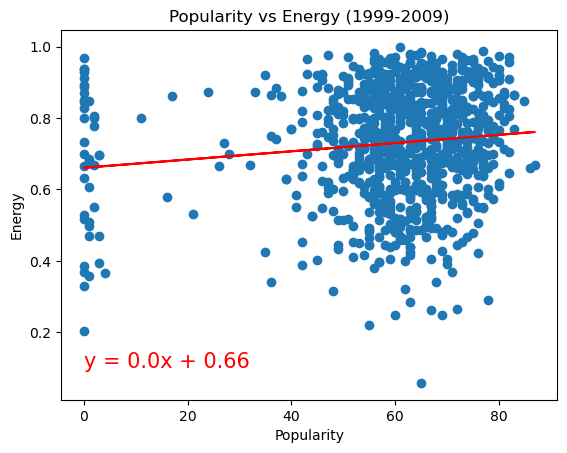

In [19]:
#Explore the relationship between song energy and popularity for entire dataset
x_values = early_df["popularity"]
y_values = early_df["energy"]
linear_reg_plot(x_values, y_values, 0, 0.1, "Popularity", "Energy", "Popularity vs Energy (1999-2009)")
plt.show()

The r-squared is: 0.009699052240596182


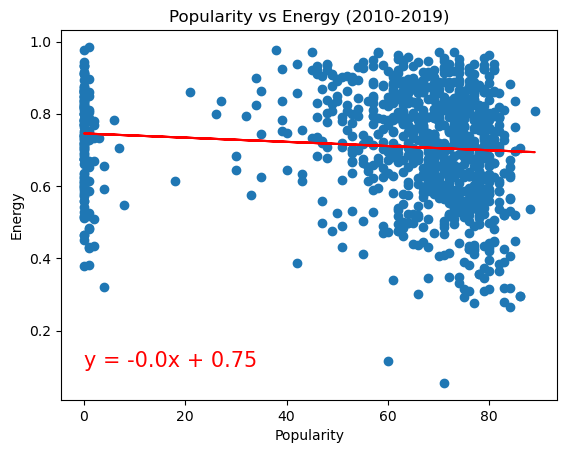

In [20]:
#Explore the relationship between song energy and popularity for entire dataset
x_values = late_df["popularity"]
y_values = late_df["energy"]
linear_reg_plot(x_values, y_values, 0, 0.1, "Popularity", "Energy", "Popularity vs Energy (2010-2019)")
plt.show()

In [22]:
#Exploring explicit nature of the 1999-2009 dataset
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in early_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

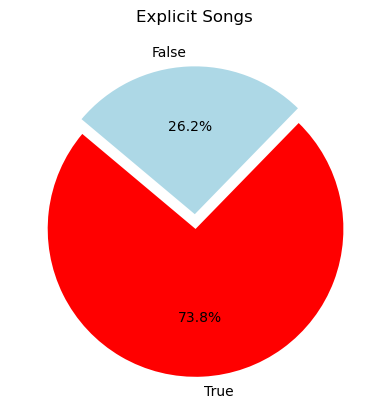

In [23]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs")
plt.show()

In [24]:
#Exploring explicit nature of the 2010-2019 dataset
#Labels for the keys because numbers are given
labels = ["True", "False"]

#Create pie chart values
values = [0,0]
for index,row in late_df.iterrows():
    data = row['explicit']
    values[data]=values[data]+1
    
# The colors of each section of the pie chart
colors = ["red", "lightblue"]

# Explode part of the pie 
explode = (0.1, 0)

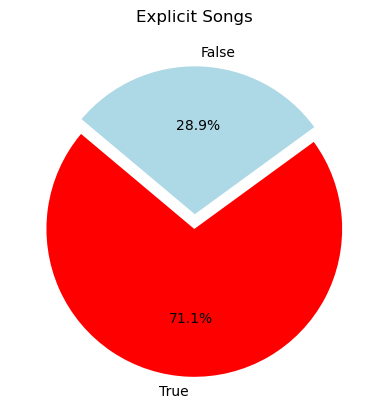

In [25]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, colors = colors, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140)
plt.title("Explicit Songs")
plt.show()